# A Single Neuron
Let's say we have a single neuron, and there are three inputs to this neuron. As in most cases, when you initiliaze parameters in neural networks, our network will have weights initilalized randomly, and biases set as zero to start. Each input also needs a weight associated with it. Inputs are the data that we pass into the model to get desired outputs, while the weights are the parameters that we'll tune later on to get these results. Weights are one of the types of values that change inside the model during the training phase, along with biases that also change during training. The values for weights and biases are what get 'trained', and they are what makes a model actually work.

These neurons sums each input multiplied by that input's weights, then adds the bias. All the neuron does is takes the fraction of inputs, where these fractions are the adjustable parameters, and adds another adjustable parameter - the bias - then outputs the result

In [1]:
inputs = [1, 2, 3]
weights = [0.2, 0.8 ,-0.5]
bias = 2

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] + 
          inputs[2] * weights[2] + bias)

output

2.3

# A Layer of Neurons
Neural Networks typically have layers that consist of more than one neuron. Layers are nothing more than a group of neurons. Each neuron in a layer takes exactly the same input - the input given to the layer, but contains its own set of weights and its own bias, producing its own unique output. The layer's output is a set of each of these outputs - One per each neuron. Let's say we have a scenario with 3 neurons in a layers and 4 inputs.

In [2]:
x = [1, 2, 3, 2.5]

w1 = [0.2, 0.8, -0.5, 1]
w2 = [0.5, -0.91, 0.26, -0.5]
w3 = [-0.26, -0.27, 0.17, 0.87]

b1, b2, b3 = 2, 3, 0.5

outputs = [
    x[0]*w1[0] +
    x[1]*w1[1] + 
    x[2]*w1[2] + 
    x[3]*w1[3] + b1,
    
    x[0]*w2[0] +
    x[1]*w2[1] + 
    x[2]*w2[2] + 
    x[3]*w2[3] + b2,
    
    x[0]*w3[0] +
    x[1]*w3[1] + 
    x[2]*w3[2] + 
    x[3]*w3[3] + b3,
]

outputs

[4.8, 1.21, 2.385]

In this code, we have three sets of weights and three biases, which define three neurons. Each neuron is connected to the same inputs. The difference is in the separate weights and bias that each neuron in the current layer has connections to every neuron from the previous layer. This is a very common type of neural network, but it should be noted that there is no requirement to fully connect everything like this. This would get very challenging to code using our current methods. Instead, we could use a loop to scale and handle dynamically-sized inputs and layers. We've turned the separate weight variables into a list of weights so we can iterate over them, and we changed the code to use loops instead of the hardcoded operations.

In [3]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

layer_outputs = []
for weight, bias in zip(weights, biases):
    output = 0
    for x, w in zip(inputs, weight):
        output += x*w
    output += bias
    layer_outputs.append(output)
    
print(layer_outputs)

[4.8, 1.21, 2.385]


# Tensors, Arrays and Vectors
*What are Tensors?*

Tensors are closely-related to arrays. I you interchange 
tensor/array/materix when it comes to machine learning, people probably won't give you too hard of a time. But there are subtle difference, and they are primarily either the context or attributes of the tensor object. To understand a tensor, let's compare and describe some of the other data containers in Python. An 2D array is said to be homologous if each array along a dimension is identically long, and this must be true for each dimension. A tensor object is an object that can be represented as an array

# A Layer of Neurons with NumPy
We can see that these operations we performed above can be done by performing dot products on two variables i.e. inputs and weights, where inputs and weights are both vectors or arrays. First, let's start by representing a single neuron in numpy.

In [4]:
import numpy as np
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs = np.dot(inputs, weights) + bias
outputs

4.8

Now we'd like to calculate the output of a layer of 3 neurons, which means the weights will be matrix or list of weights vectors. In plain Python, we wrote this as a list of lists. With NumPy, this will be a 2-dimensional array, which we'll call a matrix. NumPy makes this easy by treating this matrix as a list of vectors and performing the dot product one by one with the vector of inputs, returning a list of dot products. The dot product's result, in our case, is a vector of sums of the weight and input products for each of the neurons. From here, we still need to add corresponding biases to them. The biases can be easily added to the result of the dot product operation as they are a vector of the same size.

In [5]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(weights, inputs) + biases
layer_outputs

array([4.8  , 1.21 , 2.385])

## A Batch of Data
To train, neural networks tend to receive data in batches. So far, the example input data have been only one sample of various features called a feature set.

```inputs = [1, 2, 3, 2.5]```

Here, the data are somehow meaningful and descriptive to the output we desire. Imagine each number as a value from a different sensor. Each of these values is a feature observation datum, and together they form a feature set instance, also called a sample. Often, neural networks expect to take in many samples at a time for two reasons. One reason is that it's faster to train in batches in parallel processing, and the other reason is that batches help with generalization during training. If you perform a step of a training process on one sample at a time, it is highely likely to keep fitting to that individual sample, rather than slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting ot training in batches gives you a higher chance of making more meaningful changes to weights and biases.

A list of lists could be made into an array since it is homologous. Note that each list in this larger list is a sample representing a feature set.

```inputs = [[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]]```

We have a matrix of inputs and a matrix of weights now, and we need to perform the dot product on them somehow. As we performed a dot product on a matrix and a vector, we treated the matrix as a list of vectors, resulting in a list of dot products. In this example, we need to manage both matrices as a list of vectors and performs dot products on all of them in all combinations, resulting in a list of lists of outputs, or a matrix; this operation is called the **matrix product**

Assuming you are aware of *matrix multiplication* and *tranpose of a matrix*, To transform a list into a matrix containing a single row, we can put it into a list and create numpy array

In [6]:
a = [1, 2, 3]
print(np.array([a]))
print(np.expand_dims(np.array(a), axis = 0))

[[1 2 3]]
[[1 2 3]]


In [7]:
a = [1, 2, 3]
b = [2, 3, 4]

a = np.expand_dims(np.array(a), axis = 0)
b = np.expand_dims(np.array(b), axis = 0).T

np.dot(a, b)

array([[20]])

# A Layer of Neurons & Batches of Data
Initially, we were able to perform the dot product on the inputs and the weights without transposition because the weights were a matrix, but the inputs were just a vector. In this case, the dot product results in a vector of atomic data products performed on each row from the matrix and this single vector. When inputs become a batch of inputs, we need to perform the matrix product. It takes all of the combinations of rows from the left matrix and the columns from the right matrix, performing the dot product on them and placing the results in an output array. Both arrays have the same shape, but, to perform the matrix product, the shape's value from the index 1 of the first matrix and the index 0 of the second matrix must match.

In [8]:
inputs = [
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(inputs, np.array(weights, dtype=float).T) + biases
layer_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

# Adding Layers
At the moment, we just have one layer, which is effectively an output layer. Currently, we have no hidden layers. A hidden layer isn't an input or output layers; as the scientist, you see data as tehy are handed to the input layer and the resulting data from the output layer. Layers between these endpoints have values that we don't necessarily deal with, hence the name "hidden". Don't let this name convince you that you can't access these values, though. You will often use them to diagnose issues or improve your neural network. To explore this concept, let's add another layer to this neural network, and, for now, let's assume these layers that we're going to have will be the hidden layers, and we just have not coded our output layer yet. Before we add another layer, let's think about what will be coming. In the case of the first layer, we can see that we have an input with 4 features. Samples get fed through the input, which does not change it in any way, to our first hidden layer, which we can see has 3 sets of weights, with 4 values each.

Each of those 3 unique weights sets is associated with its distinct neuron. Thus, since we have 3 weights sets, we have 3 neurons in the first hidden layer. Each neuron has a unique set of weights, of which we have 4, which is why our intial weights have a shape of *(3, 4)*

Now, we wish to add another layer. To do that, we must make sure that the expected input to that layer matches the previous layer's output. We have set the number of neurons in a layer by setting how many weight sets and biases we have. The previous layer's influence on weight sets for the current layer is that each weight set needs to have a separate weight per input. This means a distinct weight per neuron from the previous layer. The previous layer has 3 weight sets and 3 biases, so we know it has 3 neurons. This then means, for the next layer, we can have as many weight sets as we want, but each of those weight sets must have 3 discrete weights.

In [9]:
x = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

w1 = [[0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]]
b1 = [2, 3, 0.5]

w2 = [[0.1, -0.14, -.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]]
b2 = [-1, 2, -0.5]

layer1_outputs = np.dot(x, np.array(w1).T) + b1
layer2_outputs = np.dot(layer1_outputs, np.array(w2).T) + b2

print(layer1_outputs)
print(layer2_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
[[-1.8819  -1.04185 -2.03875]
 [ 0.0434  -2.7332  -5.7633 ]
 [-1.01914  1.41254 -0.35655]]


# Training Data
Rather than hand-typing in random data, we'll use a function that can create non-linear data. Linear data can be fit with or represented by a straight line. If you were to graph data points of the form (x, y) where ```y = f(x)```, and it looks to be a line with a clear trend or slope, then chances are, they're  linear data! Linear Data are very easily approximated so easily are non-linear datasets. To simplify this, we've created a python package that you can install with pip, called ```nnfs```

In [10]:
!pip install nnfs

In [11]:
from nnfs.datasets import spiral_data
import nnfs
import numpy as np

In [12]:
# The nnfs.init() does three things: it sets the random seed to 0, creates
# a float32 dtype default, and overrides the original dot products from NumPy.

nnfs.init()

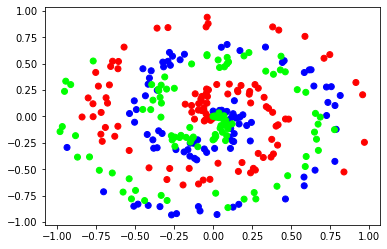

In [13]:
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

# Dense Layer Class
Now that we no longer need to hand-type our data we should create something similar for our various types of neural network layers. So far, we've only used what's called a fully-connected layer or a *Dense Layer* These layers are commonly referred to as Dense layers in papers, literature and code, but ocassionally also called a fully-connected.

Weights are often initialized randomly for a model, but not always. If you wish to load a pre-trained model, we will initialize the parameters to whatever that pretrained model finished with. It's also possible that, even for a new model, you have some other initialization rules besides random. For now, we'll stick with random initialization. Next, we have the forward method. When we pass data through a model from beginning to end, this is called a **forward pass**. Just like everything else, however, this is not the only one way to do things. You can have the data loop back around and do other intersting things. We'll keep it usual and perform a regular forward pass.

Here, we set the weights to be random and biases to be zero. **NOTE** - We're initializing weights to be *(inputs, neuron)*, rather than *(neuron, inputs)* so that we don't have to transpose everytime we perform a forward pass. We set the bias to 0 because in specific scenarios where many samples contain values of 0, a bias ensures that a neuron fires initially. It sometimes may be appropriate to initialize the biases to some non-zero number, but the most common intitialization for biases is 0. Dead neurons are neurons that does not meet the threshold of the step function anytime. This becomes a problem if this happes to this neuron for every one of the input samples.

```np.random.randn()``` produces a Guassian distribution with a mean of 0 and a variance of 1. which means that it'll generate random numbers, positive and negative, centered at 0. In general, neural networks works best with values between -1 and +1. We multiply this Gaussian distribution for the weights by 0.01 to generate numbers that are a couple of magintudes smaller. Otherwise, the model will take more time to fit the data during the training process as starting valyes will be disproportionally large compared to the updates being made during training. The idea here is to start a model with non-zero values small enough that they won't affect training. This way, we have a bunch of values to begin working with, but hopefully not too large or as zeros. This ```np.random.randn()```function takes dimension sizes as parameters and creates the output array with that shape.

```np.zeros()``` function takes a desired array shape as an argument and returns an array of the shape filled with zeros.

In [14]:
import nnfs
nnfs.init()
print(np.random.randn(2, 5))

[[ 1.7640524   0.4001572   0.978738    2.2408931   1.867558  ]
 [-0.9772779   0.95008844 -0.1513572  -0.10321885  0.41059852]]


In [15]:
nnfs.init()
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [16]:
X, y = spiral_data(samples=100, classes=3)

# Create a Dense layer with 2 input features and 3 neurons in it.
dense1 = Layer_Dense(2, 3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


# Activations

An activation function is applied to the output of a neuron, which modifies outputs. We use activation function because if the activation function itself is nonlinear, it allows for the neural networks with usually two or more hidden layers to map nonlinear functions. In general, a neural network will haev two types of activation function. The first will be the activation used in the hidden layers, and the second will be used in the output layer. Usually, the activation function used for hidden neurons will be the same for all of them, but it doesn't have to.

### Step Activation Function
A purpose of this activation function serves is to mimic a neuron 'firing' or 'not firing' based on the input information. The simplest version of this is a step function. In a single neuron, if the ```weights x inputs + bias``` results in a value greater than 0, the neuron will fire and output a 1; otherwise, it will output a 0. This activation function has been used historically in hidden layers, but nowadays, it is rarely a choice.
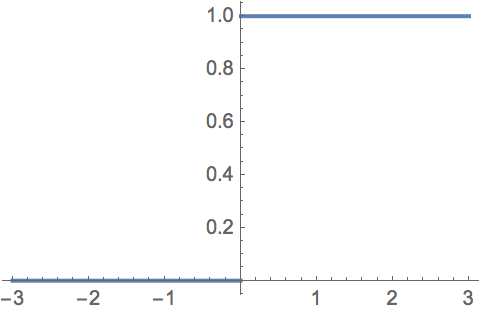

### Sigmoid Activation Function
The problem with the step function is that it's not very informative. When we get to training and network optimizers, we will see that the way an optimizer works is by assessing individual impacts that weights and biases have on a network's output. The problem with a step function is that it's less clear to the optimzier what these impacts are because there's very little information gathered from this function. It's either 1 or 0. It's hard to tell how close this step function was to activating or deactivating. Maybe it was very close, or maybe it was clost to outputting something else. Thus, when it comes time to optimizer weights and biases, it's easier for the optimizer if we have activation functions that are more granular and informative. This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0, and 1 for positive infinity. This introduces non-linearity to the neural networks.
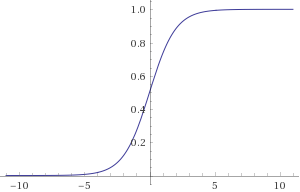

### Rectified Linear Activation Function
The sigmoid function, historically used in hidden layers, was eventually by Rectified Linear Units activation function (ReLU). ReLU is simpler than sigmoid. it's ```y=x```, clipped at 0 from the negative side. If x is less than or equal to 0, then y is 0 - otherwise, y is equal to x.
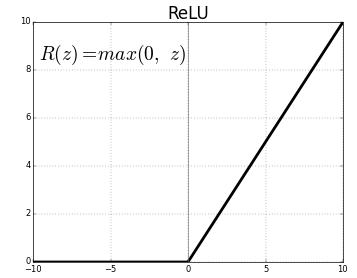

### Hyperbolic Tangent Function
This function is simliar to the sigmoid function. Output values of this function can variate from -1 to 1, indifference to the sigmoid function which covers values from 0 to 1. Although this is not what happends in the neurons, biologically wise, this function gives better results when it comes to training neural networks. Sometimes, neural networks get stuck during training when the sigmoid function, meaning that when provided with input that is strongly-negative, the output of these networks very near zero. This in turns messes up the learning process that will bemore covered in next posts.
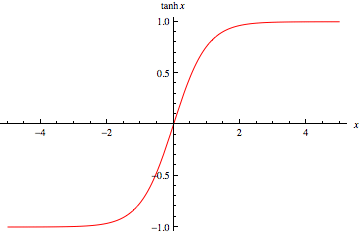

### Softmax Activation Function
A ReLU is unbounded, not normalized with other units and exclusive. To address this lack of context, the softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and produce a normalized distribution of probabilities for our classes. In the case of classification, we want a prediction of which class the network thinks the input represents. This distribution returned by the softmax activation function represent confidence scores for each class and will add up to 1. The predicted class is associated with the output neuron that returned the largest confidence scores.
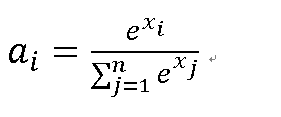

# Why use activation functions?
In most cases, for a neural network to fit a non-linear function, we need it to contain two or more hidden layers, and we need those hidden layers to use a non-linear activation function. While there are certainly problems in life that are linear in nature, for example, trying to figure out the cost of some number of shirts, and we know the cost of an individual shirt, and that there are no bulk discounts, then the equation to calculate the price of any number of those products is a linear equation. Other problems in life are not so simple, like the price of a home. The number of factors that come into play, such as size, location, time of year attempting to sell, number of rooms, yard, neighbourhood, and so on, makes the pricing of a home a non-linear equation. Many of the more interesting problems of our time are non-linear. The main attraction for neural networks has to do with their ability to solve non-linear problems.

### ReLU

In [22]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []
for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)
        
print(output)

output = []
# This can be more simply written as
for i in inputs:
    output.append(max(0, i))
    
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]
[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [23]:
# The NumPy equivalent is np.maximum()
outputs = np.maximum(0, inputs)
outputs

array([0. , 2. , 0. , 3.3, 0. , 1.1, 2.2, 0. ])

In [24]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [26]:
# Generate random spiral data 
X, y = spiral_data(samples=100, classes=3)

# Instantiating
dense = Layer_Dense(2, 3)
activation = Activation_ReLU()

# Forward passes
dense.forward(X)
activation.forward(dense.output)


print(activation.output[:5])

[[0.         0.         0.        ]
 [0.00013767 0.         0.        ]
 [0.00022187 0.         0.        ]
 [0.0004077  0.         0.        ]
 [0.00054541 0.         0.        ]]


### Softmax
Let's analyse the softmax activation function, Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative values. Imagine the output even after normalization, the last value will still be negative since we'll just divide all of them by their sum. A negative probability does not make sense. An exponential value of any number is always non-negative. 

The exponential function is also a monotonic function. This means that, with higher input values, outputs are also higher, so we won't change the predicted class after applying it while making sure that we get non-negative values. It also adds stability to the result as the normalized exponentiation is more about the difference between numbers than their magnitudes. Once we;ve exponentiated, we want to convert these numbers to a probability distribution.

In [29]:
layer_outputs = [4.8, 1.21, 2.385]
E = 2.71828182846

exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output)
print(f'exponentiated values : {exp_values}')

norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print(f'Normalized exponentiated values : {norm_values}')
print(f'Sum of normalized exponentiated values : {sum(norm_values)}')

exponentiated values : [121.51041751893969, 3.3534846525504487, 10.85906266492961]
Normalized exponentiated values : [0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized exponentiated values : 1.0


In [31]:
# We can also perform the same set of operations in NumPy
layer_outputs = [4.8, 1.21, 2.385]
exp_values = np.exp(layer_outputs)
print(f'exponentiated values : {exp_values}')

norm_values = exp_values / np.sum(exp_values)
print(f'Normalized exponentiated values : {norm_values}')
print(f'Sum of the normalized exponentiated values : {sum(norm_values)}')

exponentiated values : [121.51041752   3.35348465  10.85906266]
Normalized exponentiated values : [0.89528266 0.02470831 0.08000903]
Sum of the normalized exponentiated values : 0.9999999999999999


In [ ]:
# To train in batches, we need to convert this functionality
# to accept layer_outputs in batches.

exp_values = np.exp(inputs)
probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims=True)

probabilities

In [33]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims=True)
        self.output = probabilities

In [36]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
relu1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
relu2 = Activation_Softmax()

dense1.forward(X)
relu1.forward(dense1.output)
dense2.forward(relu1.output)
relu2.forward(dense2.output)

print(relu2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333385 0.33333308 0.3333331 ]
 [0.33333433 0.33333278 0.3333329 ]
 [0.33333364 0.33333316 0.33333322]
 [0.33333424 0.33333284 0.33333293]]


## Learnt till now
* Dense Layers
* Feedforward
* Activations

In [38]:
class Dense():
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class ReLU():
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Softmax():
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims=True)
        self.output = probabilities
        
# Creating a random dataset
X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2, 3)
relu = ReLU()
dense2 = Dense(3, 3)
softmax = Softmax()

dense1.forward(X)
relu.forward(dense1.output)
dense2.forward(relu.output)
softmax.forward(dense2.output)

softmax.output[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333333 , 0.33333328, 0.33333343],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333325, 0.33333305, 0.33333373],
       [0.33333334, 0.33333334, 0.33333334]], dtype=float32)

# Network Error with Loss
With a randomly-initialized model, or even a model intitialized with more sophisticated approaches, our goal is to train, or teach a model over time. To train a model, we tweak the weights and biases to improv the model's accuracy and confidence. To do this, we calculate how much error the model has. The **loss function**, also referred the **cost function**, is the algorith that quantifies how wrong a model is. Loss is the measure of this metric. Since loss is the model's error, we ideally want it to be 0. 

pg. 108